In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test_potus_by_county.csv
train_potus_by_county.csv



In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

# let's a take a look at the data 
train_df = pd.read_csv('../input/train_potus_by_county.csv')
test_df = pd.read_csv('../input/train_potus_by_county.csv')

train_df.head()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner
0,9278,37.9,12.6,21.3,13992.0,3802,2.42,51.9,16.6,31.6,63959.0,-0.69,-0.49,0.71,Barack Obama
1,18594,36.3,9.7,14.3,14622.0,6764,2.55,63.7,16.2,20.1,74330.0,-0.13,0.03,0.85,Barack Obama
2,662628,37.9,27.9,12.1,23909.0,267862,2.41,57.0,28.8,14.2,112687.0,-0.09,0.00,0.55,Barack Obama
3,21292,38.9,14.1,15.7,16829.0,8547,2.47,63.5,17.1,19.4,73643.0,-0.59,-0.43,0.57,Barack Obama
4,13252,34.5,15.0,15.8,13012.0,5222,2.47,53.7,20.7,25.6,56642.0,-1.16,-1.03,0.69,Barack Obama


In [3]:
test_df.head()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner
0,9278,37.9,12.6,21.3,13992.0,3802,2.42,51.9,16.6,31.6,63959.0,-0.69,-0.49,0.71,Barack Obama
1,18594,36.3,9.7,14.3,14622.0,6764,2.55,63.7,16.2,20.1,74330.0,-0.13,0.03,0.85,Barack Obama
2,662628,37.9,27.9,12.1,23909.0,267862,2.41,57.0,28.8,14.2,112687.0,-0.09,0.00,0.55,Barack Obama
3,21292,38.9,14.1,15.7,16829.0,8547,2.47,63.5,17.1,19.4,73643.0,-0.59,-0.43,0.57,Barack Obama
4,13252,34.5,15.0,15.8,13012.0,5222,2.47,53.7,20.7,25.6,56642.0,-1.16,-1.03,0.69,Barack Obama


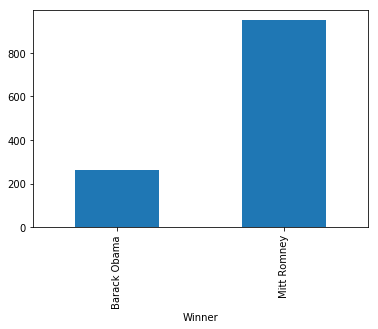

In [4]:
winner_df = train_df.groupby('Winner').size()
winner_df.plot.bar()

# clearly that the class rather imbalanced, but let's go ahead and see what happens.

In [5]:

train_df['Winner_1'] = np.where(test_df['Winner']=='Barack Obama', 1, 0)

In [6]:
# X = train_df.iloc[:, 0:14]
# y = train_df['Winner_1']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# lm = LinearRegression() 
# model = lm.fit(X_train, y_train)
# model

In [7]:
test_df.head()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner
0,9278,37.9,12.6,21.3,13992.0,3802,2.42,51.9,16.6,31.6,63959.0,-0.69,-0.49,0.71,Barack Obama
1,18594,36.3,9.7,14.3,14622.0,6764,2.55,63.7,16.2,20.1,74330.0,-0.13,0.03,0.85,Barack Obama
2,662628,37.9,27.9,12.1,23909.0,267862,2.41,57.0,28.8,14.2,112687.0,-0.09,0.00,0.55,Barack Obama
3,21292,38.9,14.1,15.7,16829.0,8547,2.47,63.5,17.1,19.4,73643.0,-0.59,-0.43,0.57,Barack Obama
4,13252,34.5,15.0,15.8,13012.0,5222,2.47,53.7,20.7,25.6,56642.0,-1.16,-1.03,0.69,Barack Obama


In [8]:
X_train = train_df.iloc[:,0:14] # dropped Winner, Winner_1 
y_train = train_df['Winner_1']
X_test = test_df.drop(['Winner'], axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((1213, 14), (1213,), (1213, 14))

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
log_y_pred = log_reg.predict(X_test)

In [11]:
log_reg_score = log_reg.score(X_train, y_train)
log_reg_score

0.83511953833470731

In [12]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

In [13]:
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rf_y_pred = rf.predict(X_test)
rf_score = rf.score(X_train, y_train)
rf_score

0.98433635614179715

In [15]:
# Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier() 
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)
sgd_score = sgd.score(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_score = dt.score(X_train, y_train)

In [17]:
results = pd.DataFrame({
    "Winner":test_df['Winner'],
    "Logistic Regression": log_y_pred,
    "Random Forest Classifier": rf_y_pred,
    "Stochastic Gradient Descent": sgd_y_pred,
    "Decision Tree": dt_y_pred
})
results.head()

,Decision Tree,Logistic Regression,Random Forest Classifier,Stochastic Gradient Descent,Winner
0,1,0,1,0,Barack Obama
1,1,0,1,1,Barack Obama
2,1,1,1,1,Barack Obama
3,1,0,1,1,Barack Obama
4,1,0,1,0,Barack Obama


In [18]:
from collections import Counter 
log_reg_count = Counter(log_y_pred)
rf_count = Counter(rf_y_pred)
sgd_count = Counter(sgd_y_pred)
dt_count = Counter(dt_y_pred)
print(log_reg_count)
print(rf_count)
print(sgd_count)
print(dt_count)

Counter({0: 1085, 1: 128})
Counter({0: 968, 1: 245})
Counter({1: 714, 0: 499})
Counter({0: 949, 1: 264})


In [19]:
results = pd.DataFrame({
    "Model": ["Logistic Reg", "Random Forest", "Stochastic Gradient Descent","Decision Tree"],
    "Barack Obama": [log_reg_count[1], rf_count[1], sgd_count[1], dt_count[1]],
    "Mitt Romney": [log_reg_count[0], rf_count[0], sgd_count[0], dt_count[0]],
    "Score": [log_reg_score, rf_score, sgd_score, dt_score]
})

# size of the dataframes we're dealing with - for comparison purposes
shapes = pd.DataFrame({
    "Dataset": ["Barack Obama","Mitt Romney"],
    "Train": [train_df.groupby('Winner').size()[0], train_df.groupby('Winner').size()[1]],
    "Test": [test_df.groupby('Winner').size()[0], test_df.groupby('Winner').size()[1]]
})

print(shapes)
results.sort_values(by="Score", ascending=False)

        Dataset  Test  Train
0  Barack Obama   264    264
1   Mitt Romney   949    949


,Barack Obama,Mitt Romney,Model,Score
3,264,949,Decision Tree,1.000000
1,245,968,Random Forest,0.984336
0,128,1085,Logistic Reg,0.835120
2,714,499,Stochastic Gradient Descent,0.516900


Clearly that decision tree is overfitted and ended up with 100% accuracy, which sounds pretty bizzare. Of course, the model performances here are not validated as the class is imbalance. We can either up-sample  the minority class / down-sample the majority class or use other methodologies to deal with it.

Will work on it soon! Stay tuned :)